In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# DATA IS FROM https://www.kaggle.com/austinreese/craigslist-carstrucks-data version 8. 
vehicles = pd.read_csv('../Raw Data/vehicles_v8.csv',parse_dates=True)

<AxesSubplot:>

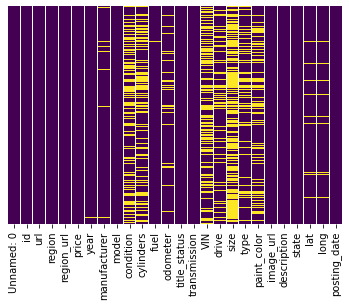

In [4]:
# CHECK FOR MISSING DATA:
sns.heatmap(vehicles.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
pd.set_option('display.max_columns', None)
vehicles.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [7]:
# ROMOVE IRRELEVANT COLUMNS AND COLUMNS MISSING TOO MUCH DATA
vehicles_trimmed = vehicles.drop(['Unnamed: 0','id','url','region_url',
                          'VIN','size','image_url','description'],
                         axis=1)

In [8]:
# DROP THE REMAINING ROWS WITH MISSING VALUES FOR SELECTED COLUMNS THAT ARE NOT MISSING A LOT OF DATA
col_keep = {'condition', 'cylinders', 'odometer','drive', 'type','paint_color'}
col_all = set(vehicles_trimmed.columns)
col_subset_remove_nan = col_all - col_keep
print(f" The following columns had rows with 'nan' values dropped: \n{col_subset_remove_nan}")

vehicles_trimmed.dropna(subset= col_subset_remove_nan, inplace=True)

 The following columns had rows with 'nan' values dropped: 
{'transmission', 'state', 'title_status', 'model', 'posting_date', 'price', 'fuel', 'manufacturer', 'long', 'year', 'region', 'lat'}


In [9]:
vehicles_trimmed = vehicles_trimmed.astype('string')
vehicles_trimmed['cylinders'] = vehicles_trimmed['cylinders'].str.extract('(\d+)', expand = False)
vehicles_trimmed['cylinders'] = vehicles_trimmed['cylinders'].astype(float)
vehicles_trimmed['price'] = vehicles_trimmed['price'].astype(float)
vehicles_trimmed['year'] = pd.to_numeric(vehicles_trimmed['year']).astype(int)
vehicles_trimmed['odometer'] = pd.to_numeric(vehicles_trimmed['odometer'])
vehicles_trimmed['lat'] = pd.to_numeric(vehicles_trimmed['lat'])
vehicles_trimmed['long'] = pd.to_numeric(vehicles_trimmed['long'])
vehicles_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422808 entries, 0 to 458211
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        422808 non-null  string 
 1   price         422808 non-null  float64
 2   year          422808 non-null  int32  
 3   manufacturer  422808 non-null  string 
 4   model         422808 non-null  string 
 5   condition     250786 non-null  string 
 6   cylinders     266797 non-null  float64
 7   fuel          422808 non-null  string 
 8   odometer      374906 non-null  float64
 9   title_status  422808 non-null  string 
 10  transmission  422808 non-null  string 
 11  drive         302400 non-null  string 
 12  type          321909 non-null  string 
 13  paint_color   294338 non-null  string 
 14  state         422808 non-null  string 
 15  lat           422808 non-null  float64
 16  long          422808 non-null  float64
 17  posting_date  422808 non-null  string 
dtypes: f

In [10]:
vehicles_trimmed.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,auburn,35990.0,2010,chevrolet,corvette grand sport,good,8.0,gas,32742.0,clean,other,rwd,other,<NA>,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500.0,2014,hyundai,sonata,excellent,4.0,gas,93600.0,clean,automatic,fwd,sedan,<NA>,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900.0,2006,bmw,x3 3.0i,good,6.0,gas,87046.0,clean,automatic,<NA>,SUV,blue,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000.0,1974,chevrolet,c-10,good,4.0,gas,190000.0,clean,automatic,rwd,pickup,blue,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500.0,2005,ford,f350 lariat,excellent,8.0,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


<AxesSubplot:>

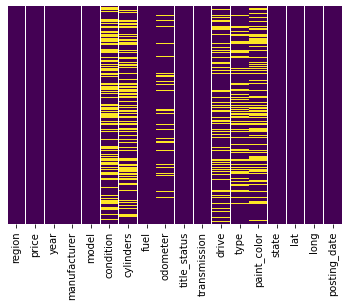

In [11]:
# CHECKING FOR MISSING VALUES AFTER TRIMMING DATA
# SOME COLUMNS ARE KEPT WITH MISSING DATA THAT CAN BE FILLED IN (VIA THE EPA TABLE OR REGRESSION), 
# OR MAY BE USEFUL FOR ANALYZING THE SMALLER SUBSET WHERE IT IS NOT NULL
sns.heatmap(vehicles_trimmed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
def impute_odometer(cols):
    year = cols[0]
    odometer = cols[1]
    
    if pd.isnull(odometer):
        return 

<AxesSubplot:ylabel='odometer'>

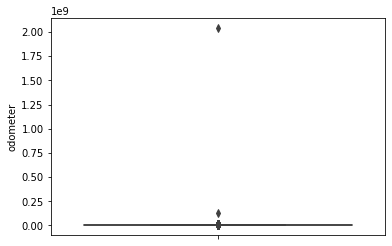

In [14]:
plt.figure()
sns.boxplot(y='odometer',data=vehicles_trimmed)